<h3>Given:</h3>
The data contains features extracted from the silhouette of
vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van,
Saab 9000 and an Opel Manta 400 cars. This particular
combination of vehicles was chosen with the expectation that
the bus, van and either one of the cars would be readily
distinguishable, but it would be more difficult to distinguish
between the cars.
<h3>Objective:</h3>
Apply the dimensionality reduction technique – PCA and train
a model using principal components instead of training the
model using just the raw data.

<h2>1. Reading the data</h2>

In [1]:
# Importing the libraries
import pandas as pd        # for data manipulation
import seaborn as sns      # for statistical data visualisation
import numpy as np         # for linear algebra
import matplotlib.pyplot as plt      # for data visualization
from scipy import stats        # for calculating statistics

# Importing various machine learning algorithm from sklearn

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,roc_curve,auc,accuracy_score
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [3]:
dataframe= pd.read_csv("concrete (1).csv")  # Reading the data
dataframe.head()   # showing first 5 datas

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [4]:
dataframe.shape

(1030, 9)

The data given has  19 columns and consist of 846 data. And all the data is read correctly.

In [5]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


<h3>Obv</h3>
    The above information shows the following<br>
    a. The attributes are either int or float except class which is object <br>
    b. Further there maybe necessary to label encode class objects<br>
       <br><br>


In [6]:
dataframe.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

There are many missing values. Should impute them.

In [7]:
dataframe.apply(lambda x: len(x.unique()))

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

<h4>From  the data:</h4>

All variable have interval data except class attribute


In [12]:
dataframe.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<h3>We can infer that:</h3>
compactness is  normal distribution <br>
circularity is Slightly right skewed as mean and max have wide range gap<br>
distance_circularity as Left skewed<br>
skewness_about as right skewed<br>





In [5]:
dt=dataframe.iloc[:,0:18].copy()
dt

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195


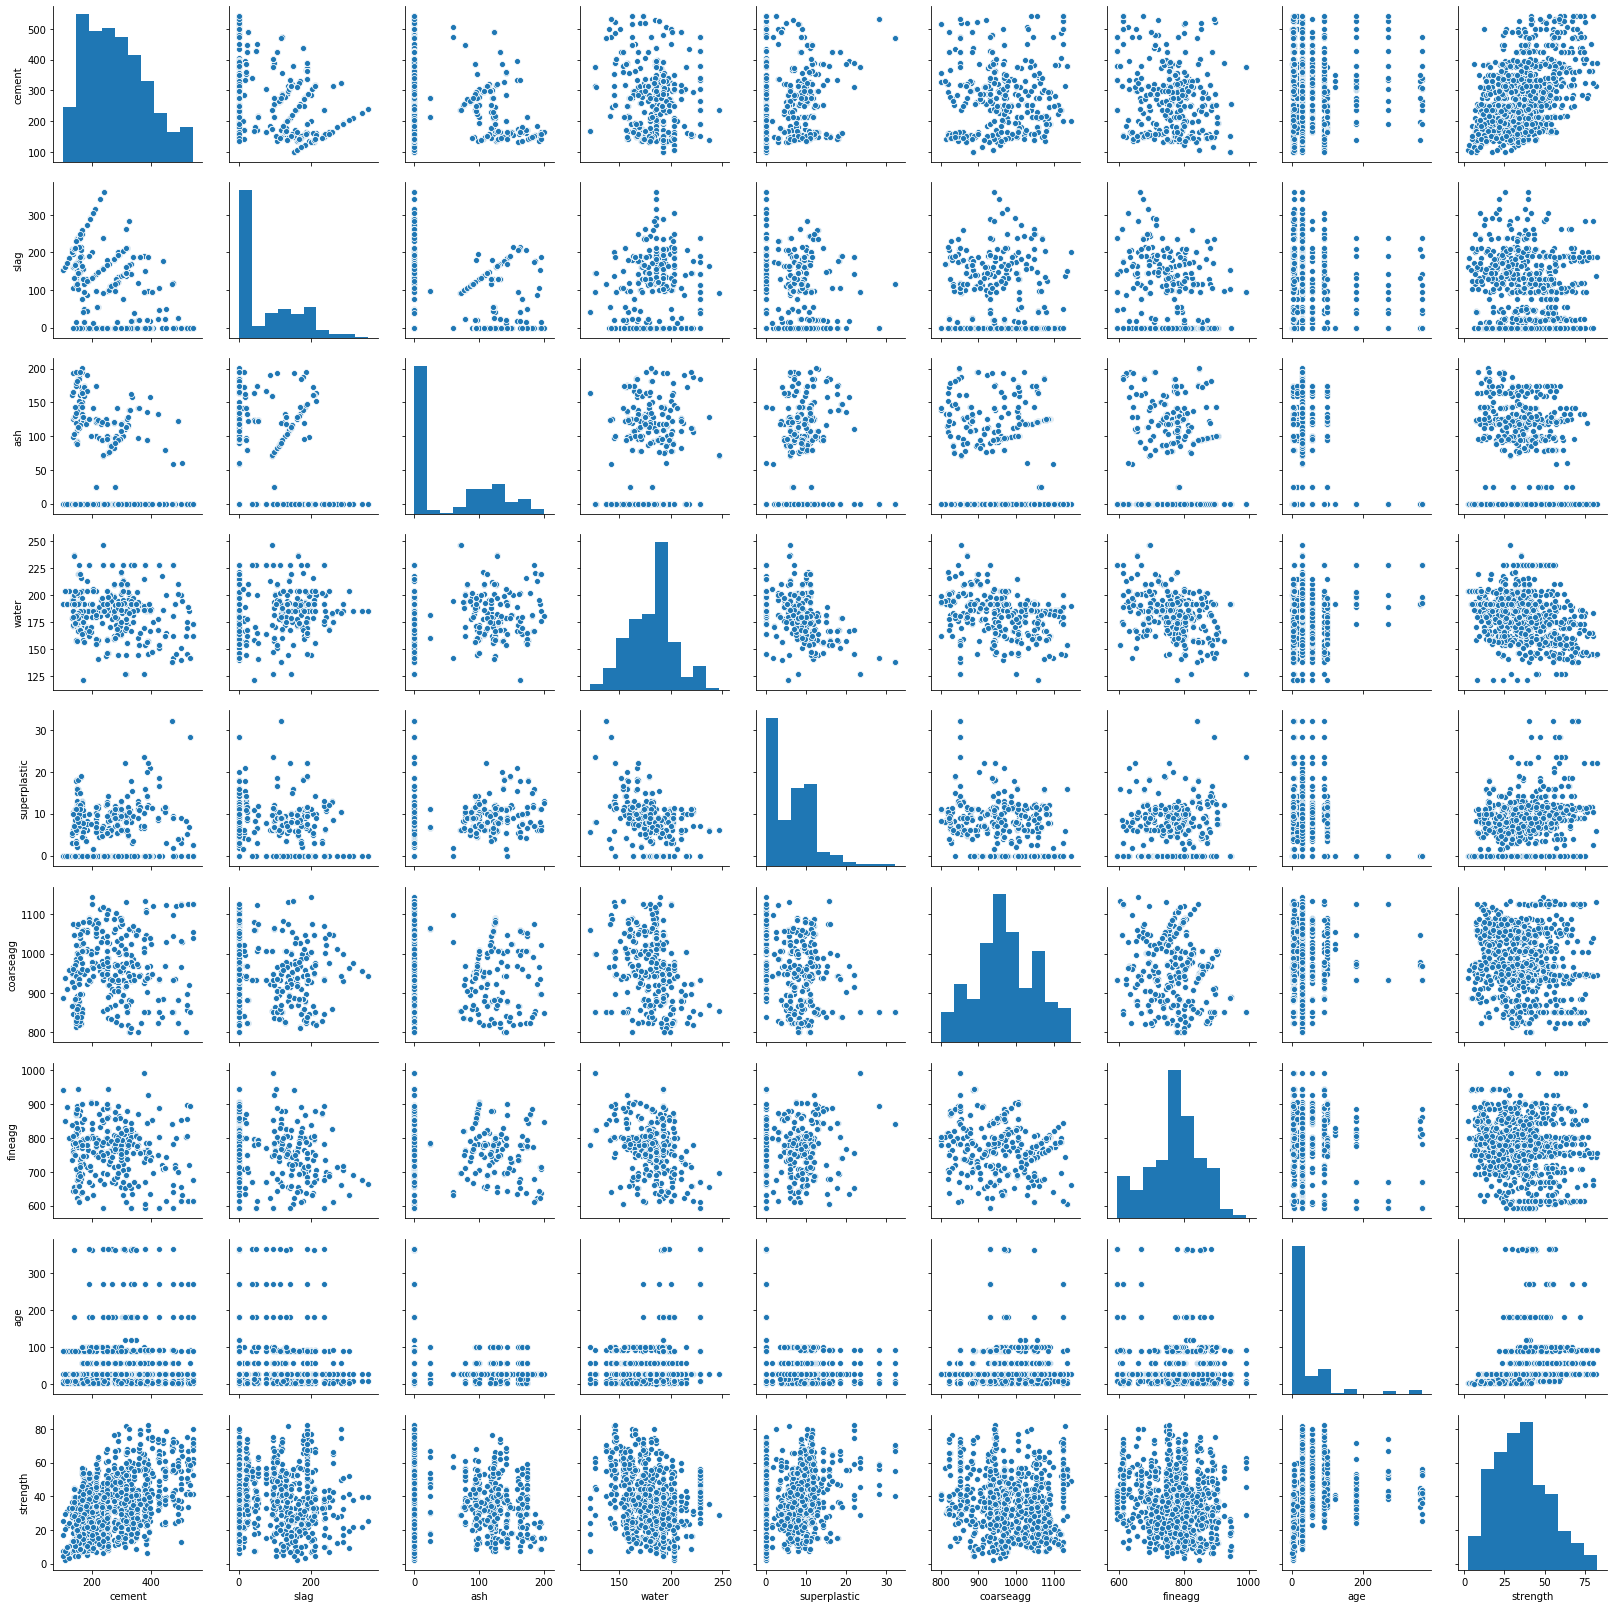

In [11]:
sns.pairplot(dataframe)

Most of these columns share a strong correlation with each other. <br>
Both negative and positive correlation can be seen among the data<br>
We can also notice certain outliers in this data.

There is a data imbalance as car has a significantly higher count as compared to bus and van.The count of car is higher as because there are 2 type of car present. And also we can see van has the lowest count.

In [13]:
dataframe.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

<h2>Cement</h2>

In [20]:
print('Range of values',dataframe.cement.max()-dataframe.cement.min())
print('Interquartile range: ',dataframe.cement.describe()['75%']-dataframe.cement.describe()['25%'])

Range of values 438.0
Interquartile range:  157.625


In [21]:
q3=dataframe.cement.describe()['75%']
q1=dataframe.cement.describe()['25%']
iqr=dataframe.cement.describe()['75%']-dataframe.cement.describe()['25%']
print('Upper outliers starts from',q3+1.5*iqr)
print('Lower outliers starts from',q1-1.5*iqr)


Upper outliers starts from 586.4375
Lower outliers starts from -44.0625


In [25]:
print('Number of Uper outliers are : ',dataframe[dataframe['cement']>586.4375].cement.count(),'(',dataframe[dataframe['cement']>586.4375].cement.count()/len(dataframe),'%)')
print('Number of Uper outliers are : ',dataframe[dataframe['cement']<-44.0625].cement.count(),'(',dataframe[dataframe['cement']<-44.0625].cement.count()/len(dataframe),'%)')

Number of Uper outliers are :  0 ( 0.0 %)
Number of Uper outliers are :  0 ( 0.0 %)


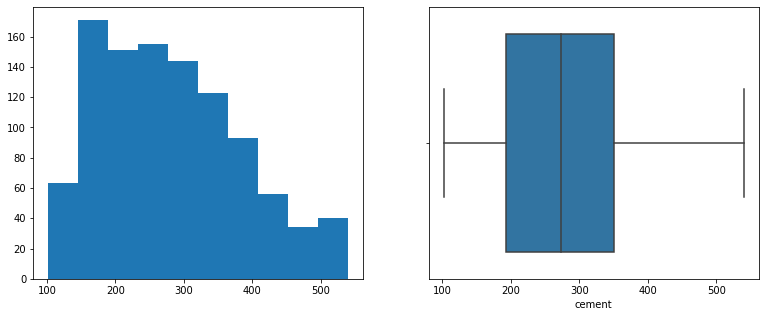

In [35]:
fig,(a1,a2)=plt.subplots(1,2,figsize=(13,5))

a1.hist(dataframe.cement)
sns.boxplot(x='cement',data=dataframe,ax=a2)


<h3>Obv</h3>
<li>Compactness column shows an approximately normal distribution curve while having no outliers.</li>

<li>The distribution plot of the circularity column has 3 peaks and is right skewed.</li><li>Distance Circularity is left skewed and has 2 peaks in the plot.
</li>
<li>Radius ratio has outliers and is right screwed a bit</li>
<li>Pr.Axis aspect ratio is approx normally distributed as well as right skewed and there is presence of outliers.</li>
<li> Scaled_radius_of_gyration.1 approximatly normal distribution with no outliers.</li>


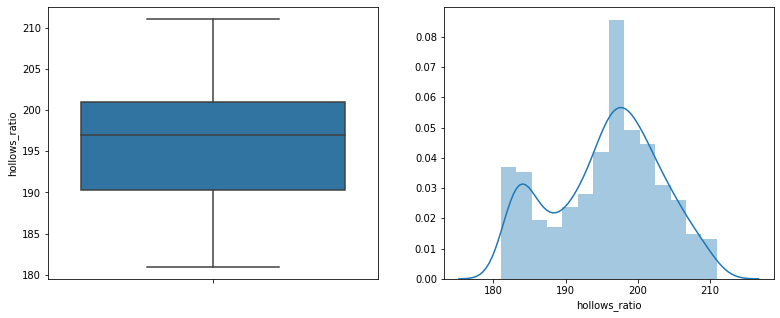

In [4]:
fig,(a1,a2)=plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))
sns.boxplot(x = 'hollows_ratio', data = dataframe, orient = 'v', ax = a1)
sns.distplot(dataframe.hollows_ratio, ax = a2)

Hollow_ratio has 2 peaks and no outliers in the data.

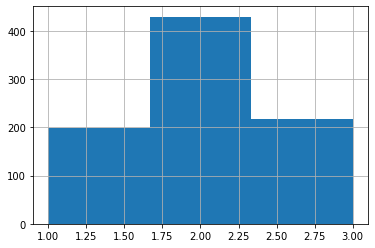

In [112]:
dataframe["class"].hist(bins=3)

As in the data, the count of car is more compared to bus and van. Due to which there maybe chances that the model perdiction will be effected due to this.<br>
<h2>Checking the influence of various attributes on customer subscribing term deposit </h2>

Here we can see some attributes are positively correlated (ex. circularity and max.length_rectangularity)<br>
negatively correlated (elongatedness and scatter_ratio<br>
and no correlation at all (compactness and skewness_about.1)
<br>Checking the effect of these variables om target i.e class attribute
<h3>Influence of Elongatedness & scatter_ratio on Target</h3>



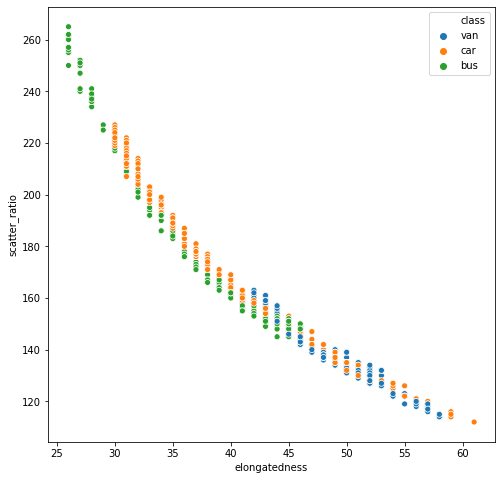

In [118]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='elongatedness',y='scatter_ratio' ,data=dataframe,hue='class')


<h4>Obv:</h4>  Looks like bus has lesser elongatedness  but scatter ratio is highest<br>
van is quite opposite to bus where elongatedness is higher and scatter ratio  is in lesser range<br>
<h3>Influence of circularity & max.length_rectangularity on target
</h3>


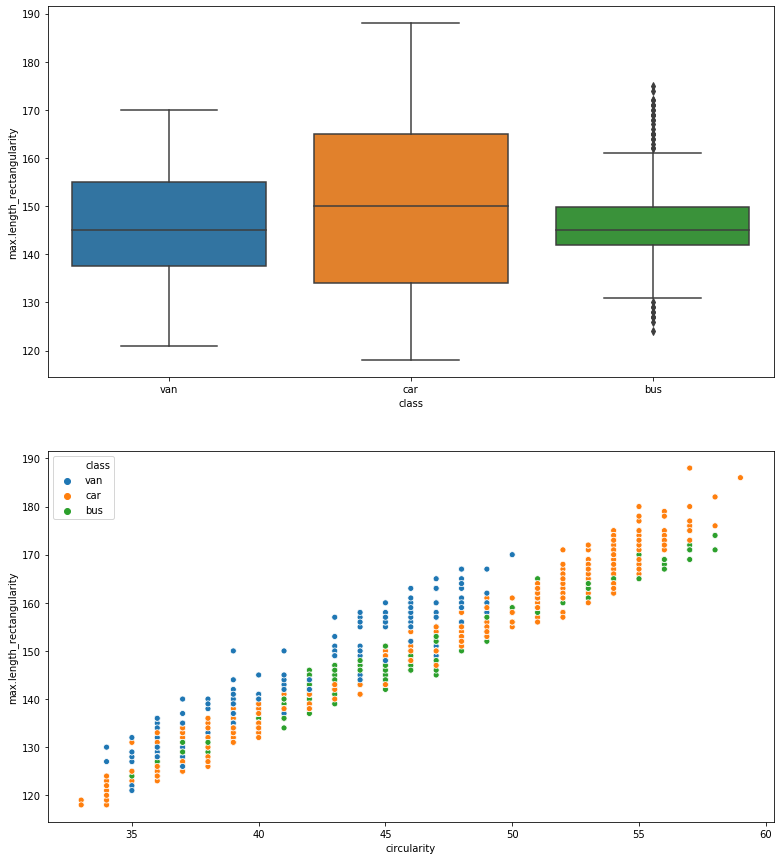

In [147]:
fig,(a1,a2)=plt.subplots(nrows = 2, ncols = 1, figsize = (13, 15))
sns.boxplot(x='class',y='max.length_rectangularity',data=dataframe,ax=a1)
sns.scatterplot(x='circularity',y='max.length_rectangularity',hue='class',data=dataframe,ax=a2)


<h4>Obv</h4>a. car has a wide range of cicularity and also max.length_rectangularity.<br>
b. Whereas the bus and van do not.<br>
c. So cicularity and max.lenght_rectangularity can be used to classify mainly bus and van but not cars


<h3>Influence of scaled_radius_of_gyration.1 on class
</h3>

<Figure size 720x720 with 0 Axes>

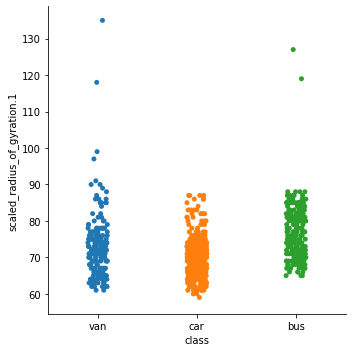

In [153]:
plt.figure(figsize=(10,10))
sns.catplot(x="class",y='scaled_radius_of_gyration.1', data=dataframe)

<h3>Obv</h3>
We can see that scaled_radius_of_gyration.1 cant only use alone to classify the vehicles.

<h3>Influence of circularity and distance_circularity on class
</h3>

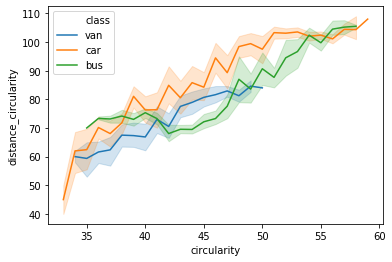

In [137]:
sns.lineplot(x='circularity',y='distance_circularity',data=dataframe,hue='class')


<h4>Obv</h4>
The distance_circularity increases as circularity increases for all the class of vehicles.
<br>
also we can infer that the van has lesser cirularity and distance_circularity than others



<h2>Corelation of Attributes</h2>

In [22]:
corelation=dt.corr()
corelation

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,0.091704,0.148249,0.812235,-0.788643,0.813636,0.676143,0.762770,0.815901,0.585156,-0.250071,0.235687,0.157387,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.620967,0.153362,0.251208,0.848207,-0.821901,0.844972,0.961943,0.796822,0.838525,0.926888,0.052642,0.144394,-0.011851,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.767079,0.158397,0.264550,0.904400,-0.911435,0.893128,0.774669,0.861980,0.887328,0.705953,-0.225852,0.113813,0.265553,0.145563,0.332095
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,0.450036,0.734228,-0.789795,0.708285,0.569205,0.794041,0.720150,0.536536,-0.180819,0.048720,0.173832,0.382129,0.471262
pr.axis_aspect_ratio,0.091704,0.153362,0.158397,0.663559,1.000000,0.648704,0.103715,-0.183264,0.079395,0.127128,0.273414,0.089620,0.122111,0.152776,-0.058481,-0.032134,0.239849,0.267724
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450036,0.648704,1.000000,0.165967,-0.180041,0.161592,0.305943,0.318955,0.143713,0.189704,0.295574,0.015439,0.043489,-0.026180,0.143919
scatter_ratio,0.812235,0.848207,0.904400,0.734228,0.103715,0.165967,1.000000,-0.970723,0.989370,0.808356,0.948296,0.993784,0.799266,-0.027985,0.074308,0.213127,0.005167,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183264,-0.180041,-0.970723,1.000000,-0.949077,-0.775519,-0.936715,-0.955074,-0.766029,0.103481,-0.051997,-0.185691,-0.114727,-0.216719
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,0.079395,0.161592,0.989370,-0.949077,1.000000,0.811447,0.934568,0.989490,0.797068,-0.015676,0.082974,0.214734,-0.018990,0.099191
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,0.127128,0.305943,0.808356,-0.775519,0.811447,1.000000,0.745209,0.796018,0.866425,0.041220,0.135745,0.001658,-0.104254,0.076770


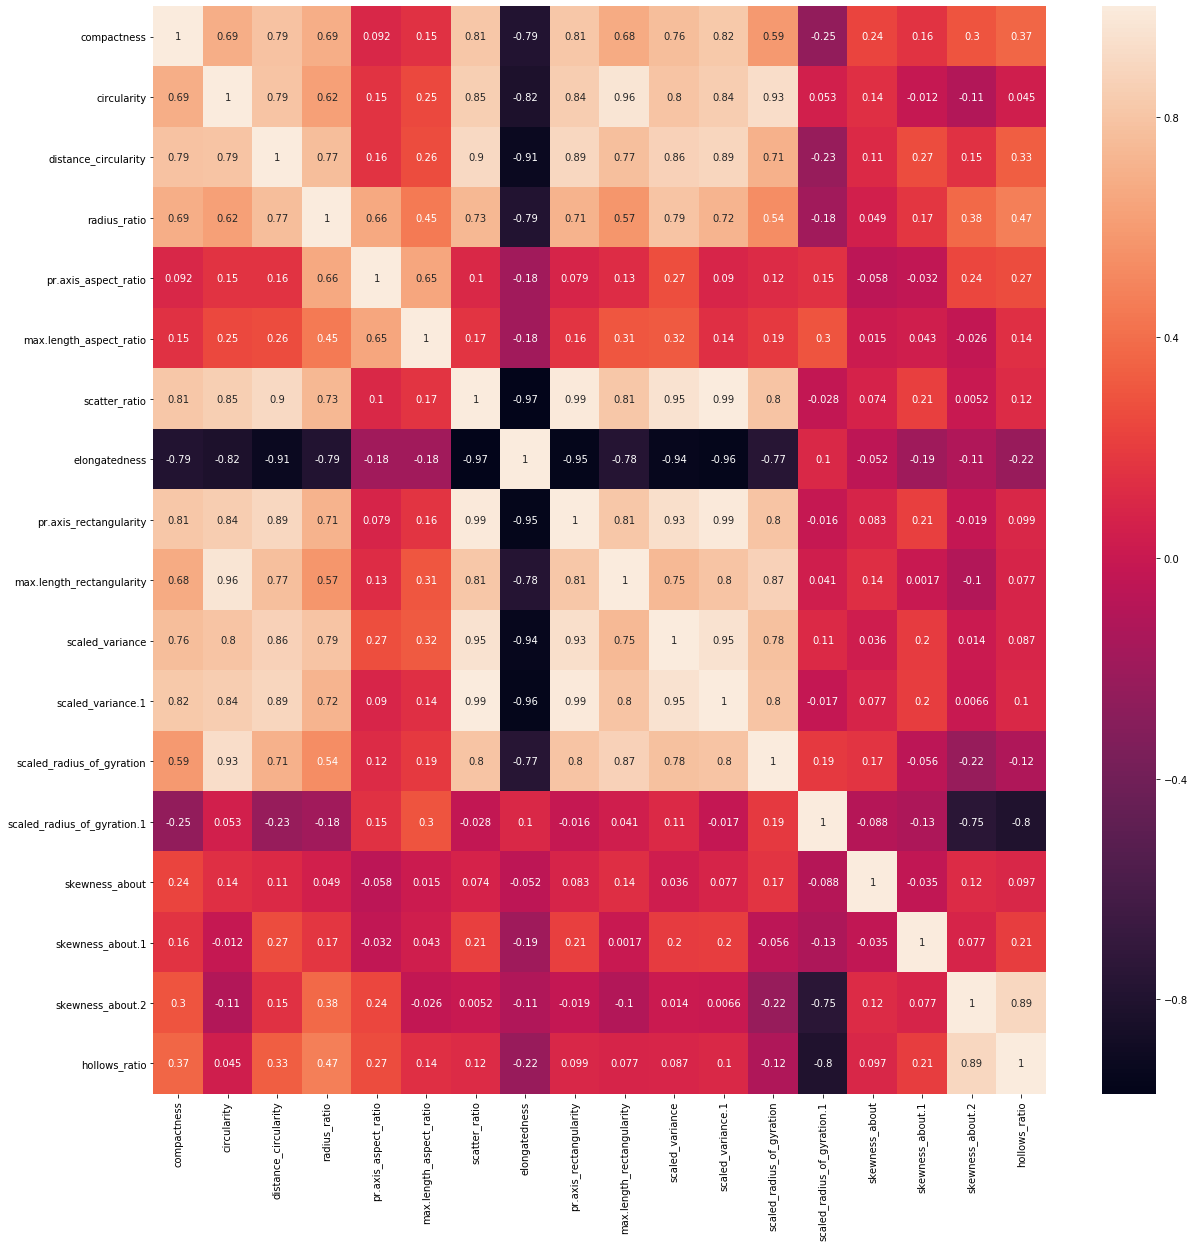

In [23]:
plt.figure(figsize=(20,20))
a=sns.heatmap(corelation,annot=True)

<h3>Obv</h3>
<li>Here most of the column share high collinearity both negatively and positively. </li>
<li>And also we can see that elongatedness is most negatively corelated with almost all the data.</li>
<li>This should not be the case in the model.</li>
<li>As data are correlated, we can drop some of the columns which are corelated.</li>

<h2>Preparing the data for modeling</h2>



<h2>Classification Models</h2>


In [6]:
dataframe.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

In [83]:
features=['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio']
X=dataframe[features]
Y=dataframe['class']         

Normalising the data

In [84]:
X=X.apply(zscore)
X

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.517302,0.056545,0.272965,1.310206,0.311542,-0.208038,0.136580,-0.225160,0.758332,-0.403077,-0.343028,0.285618,-0.327938,-0.074340,0.380665,-0.312193,0.183957
1,-0.325470,-0.624564,0.120112,-0.835442,-0.593962,0.094079,-0.599893,0.520853,-0.611739,-0.344578,-0.594546,-0.620879,-0.513719,-0.059987,0.537873,0.156589,0.013088,0.452977
2,1.254193,0.843549,1.518571,1.201630,0.548539,0.311542,1.148382,-1.144331,0.934576,0.689401,1.096764,1.108603,1.392391,0.073989,1.558230,-0.403603,-0.149552,0.049447
3,-0.082445,-0.624564,-0.007021,-0.296217,0.167705,0.094079,-0.750606,0.648945,-0.611739,-0.344578,-0.913661,-0.739958,-1.466773,-1.265769,-0.074340,-0.291565,1.639494,1.529056
4,-1.054545,-0.135193,-0.769817,1.081803,5.245485,9.444962,-0.599893,0.520853,-0.611739,-0.275646,1.671171,-0.649231,0.408593,7.308682,0.537873,-0.179527,-1.450677,-1.699181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.082445,-0.950811,0.310811,0.422750,0.294650,-0.123383,0.002961,-0.119602,-0.225160,-0.964965,0.362799,-0.099199,-0.790412,-0.059987,0.129731,1.389011,-0.149552,-0.085062
842,-0.568495,0.191055,0.120112,-0.176389,0.548539,0.529004,-0.298466,0.264671,-0.225160,0.758332,-0.498811,-0.405402,0.039668,-0.059987,-1.094696,0.828819,-0.474833,0.183957
843,1.497218,1.496044,1.200739,1.591071,0.675483,0.746467,1.600522,-1.400514,1.707733,1.723379,1.256322,1.596260,0.777517,-0.327938,-0.686554,-0.963795,-0.312193,0.721997
844,-0.933032,-1.440183,-0.261286,-0.685658,-0.467017,-0.340845,-1.021890,1.161309,-0.998318,-1.654284,-1.073218,-0.961105,-0.821156,-0.863842,-1.298768,1.389011,0.175729,-0.085062


Label Encoding the target "class" column where<br>
van is label encoded as 1 <br>
car is label encoded as 2 <br>
bus is label encoded as 3<br>

In [85]:
Y.replace(['van','car','bus'],[1,2,3],inplace=True)
Y

<bound method Series.unique of 0      1
1      1
2      2
3      1
4      3
      ..
841    2
842    1
843    2
844    2
845    1
Name: class, Length: 846, dtype: int64>

<h3> Splitting the Data</h3>
Splitting the model in 7:3 ratio

In [55]:
train_X,test_X,train_y,test_y=train_test_split(X,Y,test_size=0.3,random_state=1)
train_X.count() 

compactness                    592
circularity                    592
distance_circularity           592
radius_ratio                   592
pr.axis_aspect_ratio           592
max.length_aspect_ratio        592
scatter_ratio                  592
elongatedness                  592
pr.axis_rectangularity         592
max.length_rectangularity      592
scaled_variance                592
scaled_variance.1              592
scaled_radius_of_gyration      592
scaled_radius_of_gyration.1    592
skewness_about                 592
skewness_about.1               592
skewness_about.2               592
hollows_ratio                  592
dtype: int64

In [29]:
train_X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
350,0.403605,0.191055,1.200739,1.231587,0.548539,-0.123383,0.696242,-0.760058,0.547997,0.206877,0.618091,0.603935,-0.175538,-0.863842,-1.094696,2.173280,0.338369,0.587487
40,0.160580,0.517302,1.391438,1.351415,0.675483,0.094079,1.088097,-1.144331,0.934576,0.206877,1.224410,1.068910,0.839004,0.207965,-0.278411,-0.403603,-0.474833,-0.354082
89,-1.662107,-1.277059,-1.596179,-1.584366,-0.847851,-0.558308,-1.323317,1.673674,-0.998318,-1.585352,-1.488068,-1.193592,-1.313055,1.145795,0.333802,-0.851757,-1.775958,-1.564671
427,-0.933032,-1.113935,0.437943,0.213051,-0.340073,0.094079,0.002961,-0.247693,-0.225160,-1.102829,0.043684,-0.065176,-0.821156,-0.729866,0.129731,2.285318,0.663650,0.856507
353,-1.540595,0.354178,-0.833383,-0.685658,0.294650,-0.558308,-0.539607,0.392762,-0.611739,-0.068850,-0.562634,-0.564174,0.623799,0.341941,-0.278411,-1.411949,-0.962755,-1.026631


In [30]:
test_X.count()

compactness                    254
circularity                    254
distance_circularity           254
radius_ratio                   254
pr.axis_aspect_ratio           254
max.length_aspect_ratio        254
scatter_ratio                  254
elongatedness                  254
pr.axis_rectangularity         254
max.length_rectangularity      254
scaled_variance                254
scaled_variance.1              254
scaled_radius_of_gyration      254
scaled_radius_of_gyration.1    254
skewness_about                 254
skewness_about.1               254
skewness_about.2               254
hollows_ratio                  254
dtype: int64

In [31]:
test_X.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
693,-0.446982,0.191055,-0.451985,-1.075098,-0.847851,0.529004,-0.268323,0.264671,-0.225160,0.896196,-0.498811,-0.399732,-0.114050,0.609892,-1.298768,0.380665,-1.125395,-0.488592
375,1.861755,1.169797,0.819341,0.602491,-0.467017,-0.993232,1.751236,-1.528605,1.707733,0.689401,2.341313,1.908134,1.300160,1.279771,-1.298768,0.716780,-0.312193,-1.295651
185,0.768143,-0.624564,-0.451985,1.081803,1.183261,-0.775770,0.213959,-0.631967,0.161418,-0.689238,0.490445,0.224016,-0.728925,-0.059987,0.129731,0.716780,1.314212,0.183957
464,0.768143,0.680426,-0.134154,1.111760,1.056317,-0.558308,0.424958,-0.760058,0.161418,0.551537,0.554268,0.439492,0.716030,0.073989,-0.686554,0.044550,1.476853,0.452977
709,0.160580,-0.461440,0.882908,0.842147,0.421594,0.094079,0.274245,-0.503876,0.161418,-0.482442,0.330888,0.195664,-0.790412,-0.729866,-1.094696,1.837164,0.663650,0.587487


<h2>Using SVC for prediction</h2><br>
Trianing the model

In [56]:
parameters={
    'C':[0.01,0.25,0.5,1],
    'kernel':['rbf','linear']
}
model=SVC()
best_SVC=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)
best_SVC

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Predicting from the trained model and showing the confusion matrix

In [57]:
best_SVC.fit(train_X,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [58]:
best_SVC.best_params_

{'C': 1, 'kernel': 'rbf'}

In [59]:
svm_model=SVC(C=1,kernel='rbf',random_state=1)
svm_model

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [60]:
svm_model=svm_model.fit(train_X,train_y)

In [61]:
predict=svm_model.predict(test_X)
print(predict[0:1000])
metrics=confusion_matrix(test_y,predict)
metrics

[1 3 3 3 2 2 1 1 1 1 1 1 3 2 3 2 1 3 1 3 2 2 2 2 1 1 3 2 2 2 2 1 3 2 3 2 3
 2 3 3 2 1 1 2 1 1 2 2 2 2 2 2 3 2 2 1 2 2 1 3 2 1 2 1 3 2 2 2 2 3 2 1 2 1
 3 2 2 2 1 2 2 1 2 2 3 2 1 2 3 3 2 3 1 2 1 1 3 3 3 2 2 2 1 1 1 2 2 2 2 2 2
 3 2 2 2 1 2 1 1 2 2 1 2 1 2 2 1 2 1 2 2 2 2 2 2 3 3 2 1 3 2 1 2 1 3 3 3 3
 3 2 2 2 2 2 2 2 2 1 3 1 2 3 2 2 3 2 2 1 2 3 3 3 3 2 2 3 1 2 1 3 2 3 3 2 2
 3 3 3 3 1 2 3 3 2 1 3 2 2 2 3 1 2 3 2 1 3 2 1 2 2 3 2 3 2 3 2 2 1 2 2 2 2
 2 3 1 2 2 2 2 1 2 2 1 2 2 2 1 1 2 3 2 2 2 3 1 2 3 2 3 2 1 2 3 3]


array([[ 55,   1,   6],
       [  3, 129,   1],
       [  1,   0,  58]])

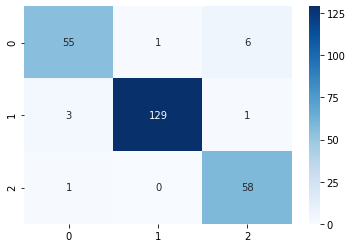

In [62]:
sns.heatmap(metrics,annot=True,fmt='g',cmap='Blues')

In [18]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           1       0.93      0.89      0.91        62
           2       0.99      0.97      0.98       133
           3       0.89      0.98      0.94        59

    accuracy                           0.95       254
   macro avg       0.94      0.95      0.94       254
weighted avg       0.95      0.95      0.95       254



In [19]:
svm_accuracy=accuracy_score(test_y,predict)
svm_accuracy

0.952755905511811

In [20]:

svm_eval = cross_val_score(estimator = svm_model, X = train_X, y = train_y, cv = 10)
svm_eval.mean()

0.9594067796610168

<h3>Obv:</h3>
The heat map shows that the model perdicts the outcome pretty good as the data are pretty much correlated.<br>
The f1 score is also looks fine (91%)<br>
As we can see the accuracy is 95.27% which indicates the model predicts well enough.<br>
The mean after the cross validation is also showing the better result 95.94%<br>
<br>
<h2> Using PCA with SVM model</h2>
<br>



Giving n_components as 18 i.e the number of columns (Except class)

In [21]:
pca=PCA(n_components=18)
pca

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Fitting the mondel the pca and displaying Eigen values

In [22]:
pca.fit(X)
pca.explained_variance_

array([9.40828822e+00, 3.01605477e+00, 1.90347881e+00, 1.18027268e+00,
       9.17174067e-01, 5.39279825e-01, 3.58566463e-01, 2.21661730e-01,
       1.60036194e-01, 9.17140864e-02, 6.65751851e-02, 4.59556829e-02,
       3.54023825e-02, 2.67096104e-02, 2.03690624e-02, 1.74414127e-02,
       9.23357029e-03, 3.08801865e-03])

 Variance ratio will  be

In [23]:
pca.explained_variance_ratio_

array([5.22064851e-01, 1.67360538e-01, 1.05623824e-01, 6.54931979e-02,
       5.08938854e-02, 2.99245766e-02, 1.98968125e-02, 1.22999843e-02,
       8.88039031e-03, 5.08920430e-03, 3.69424950e-03, 2.55007565e-03,
       1.96447421e-03, 1.48211326e-03, 1.13027697e-03, 9.67822019e-04,
       5.12369772e-04, 1.71353806e-04])

And the eigen vectors will be

In [24]:
pca.components_

array([[ 2.75259459e-01,  2.93392341e-01,  3.04556452e-01,
         2.67593206e-01,  8.04938998e-02,  9.72198560e-02,
         3.16872006e-01, -3.14042361e-01,  3.13953009e-01,
         2.82790417e-01,  3.09310530e-01,  3.14149034e-01,
         2.72002525e-01, -2.09179819e-02,  4.13316728e-02,
         5.83331566e-02,  3.01560495e-02,  7.40813666e-02],
       [-1.27010856e-01,  1.26217125e-01, -7.26862818e-02,
        -1.89635192e-01, -1.22158741e-01,  1.07277825e-02,
         4.80473095e-02,  1.27991503e-02,  6.00351423e-02,
         1.16182501e-01,  6.17536908e-02,  5.32757796e-02,
         2.09279660e-01,  4.88541866e-01, -5.49212020e-02,
        -1.24152855e-01, -5.40947666e-01, -5.40279812e-01],
       [-1.19874162e-01, -2.51835016e-02, -5.60058748e-02,
         2.75066087e-01,  6.42046458e-01,  5.91799912e-01,
        -9.76530949e-02,  5.74645766e-02, -1.09509169e-01,
        -1.69994013e-02,  5.64656174e-02, -1.08711428e-01,
        -3.13685232e-02,  2.86211092e-01, -1.15693651e

Bar plotting the eigen values

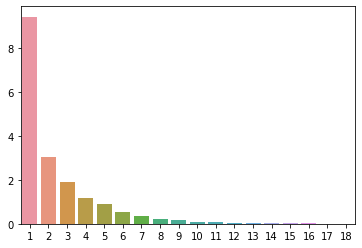

In [46]:
sns.barplot(x=list(range(1,19)),y=pca.explained_variance_)

Elbow plotting the eigen values

Text(0, 0.5, 'Eigenvalue')

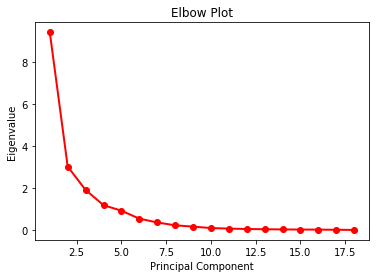

In [47]:
plt.plot(list(range(1,19)),pca.explained_variance_,'ro-', linewidth=2)
plt.title('Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Text(0.5, 0, 'Eigen value')

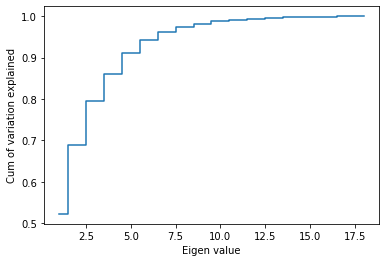

In [48]:
plt.step(list(range(1,19)), np.cumsum(pca.explained_variance_ratio_), where = 'mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen value')


We have 8 components in this model that explain 95% variation in this data.
<br>
So giving n_components as 8 and performing PCA

In [25]:
pca=PCA(n_components=8)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

The eigen value, variance ratio will be

In [26]:
pca.explained_variance_

array([9.40828822, 3.01605477, 1.90347881, 1.18027268, 0.91717407,
       0.53927982, 0.35856646, 0.22166173])

In [27]:
pca.explained_variance_ratio_

array([0.52206485, 0.16736054, 0.10562382, 0.0654932 , 0.05089389,
       0.02992458, 0.01989681, 0.01229998])

In [28]:
pca_X = pca.transform(X)

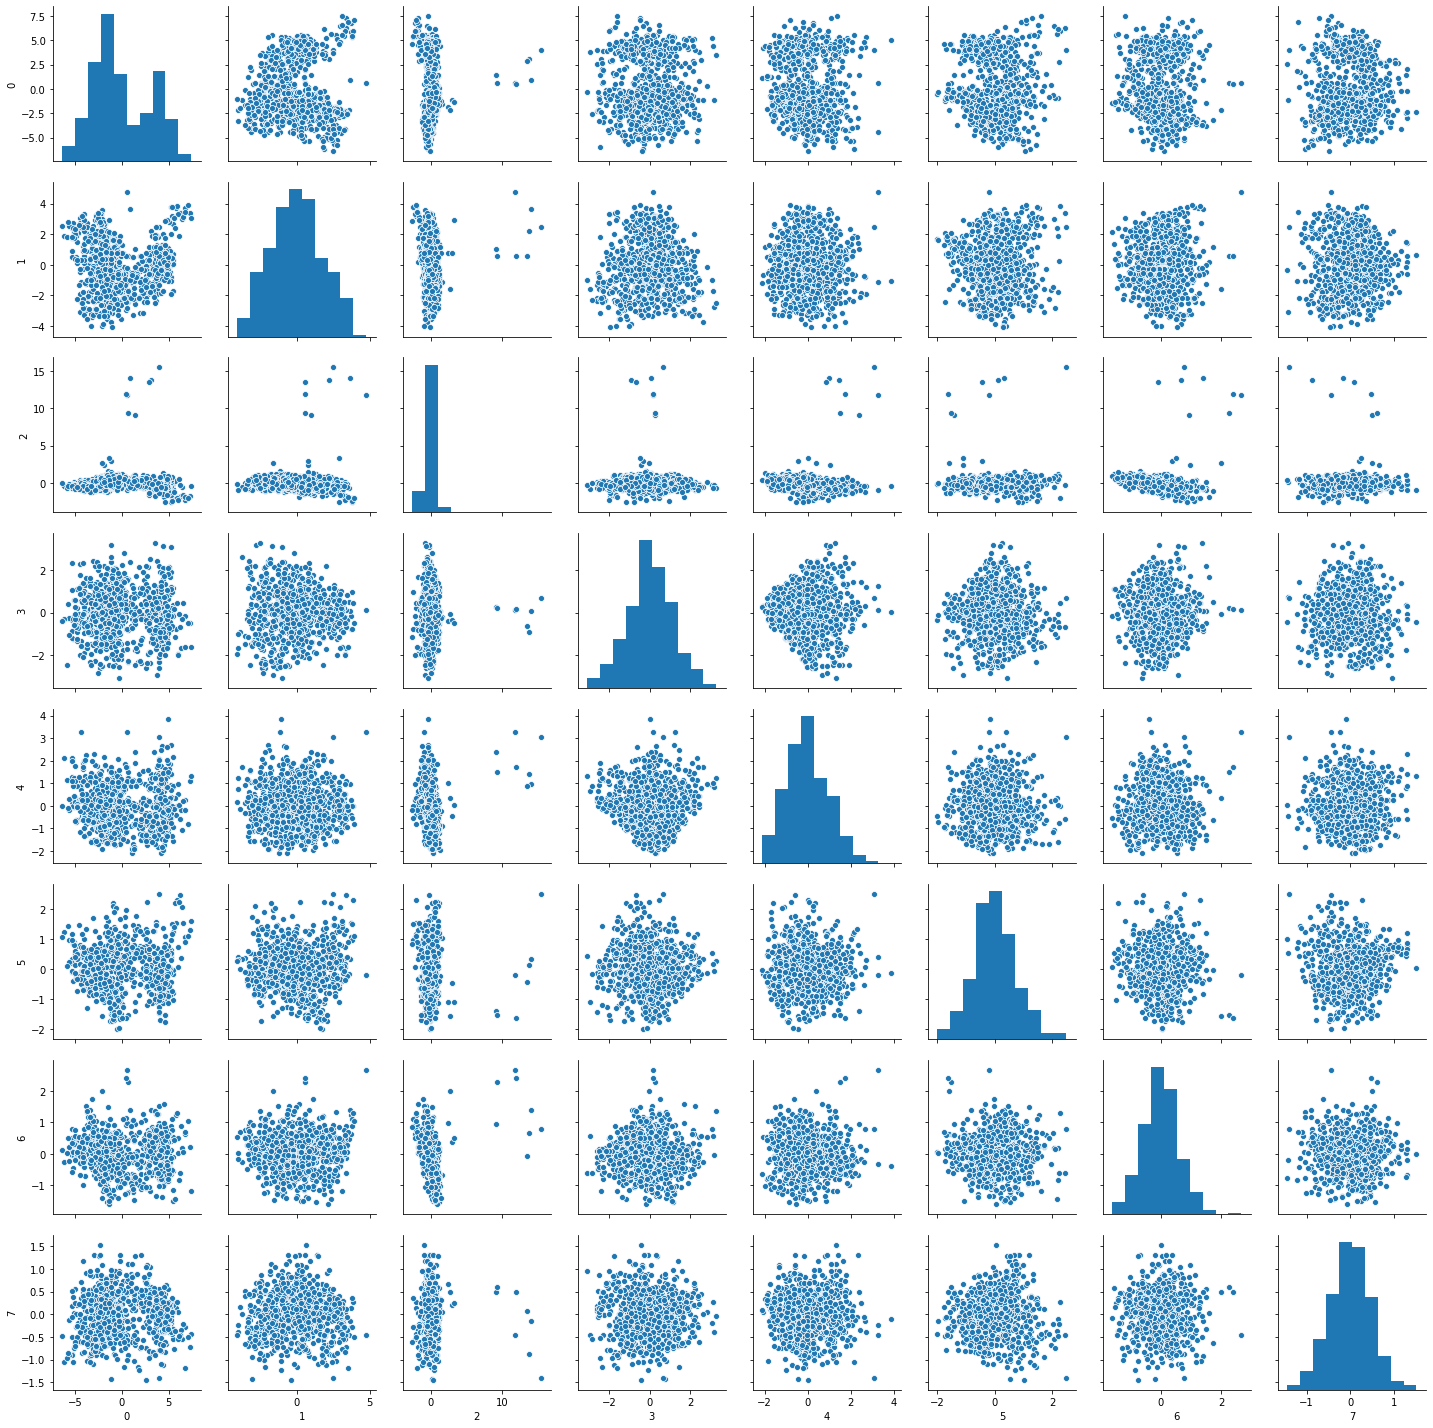

In [54]:
sns.pairplot(pd.DataFrame(pca_X))

So we can see that the correlation is removed among the data and is ready to be get trained on. <br>The data is reduced to 8 columns

Again splitting and training the model

In [30]:
train_X,test_X,train_y,test_y=train_test_split(pca_X,Y,test_size=0.3,random_state=1)
pd.DataFrame(train_X).count()

0    592
1    592
2    592
3    592
4    592
5    592
6    592
7    592
dtype: int64

<h3>Preparing SVC model with GridSearch for getting the best model</h3>

In [31]:
parameters={
    'C':[0.01,0.25,0.5,1],
    'kernel':['rbf','linear']
}
model=SVC()
best_PCA_SVC_grid=GridSearchCV(model,param_grid=parameters,scoring='accuracy',cv=10)
best_PCA_SVC_grid

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

<h3>Fitting the model with gridsearch</h3>

In [32]:
best_PCA_SVC_grid.fit(train_X,train_y)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.25, 0.5, 1],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

Getting the best parameters for the model

In [33]:
best_PCA_SVC_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

<h3> Trainig the model on the above parameters<h3>

In [34]:
best_PCA_SVC=SVC(C=1,kernel='rbf',random_state=1)
best_PCA_SVC

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

Fitting the data in the model

In [35]:
best_PCA_SVC=best_PCA_SVC.fit(train_X,train_y)

Predicting from the model

In [48]:
predict=best_PCA_SVC.predict(test_X)
print(predict[0:1000])
metrics_pca=confusion_matrix(test_y,predict)
metrics_pca

[1 3 3 3 2 2 1 1 1 1 1 1 3 2 3 2 1 3 1 3 2 2 2 2 1 1 3 2 2 2 2 1 3 2 3 2 3
 2 3 3 2 1 1 2 1 1 2 2 2 2 2 2 3 2 2 1 2 2 1 3 2 1 2 1 3 2 2 2 2 3 2 1 2 1
 3 2 2 2 1 2 2 1 2 2 3 2 1 2 3 3 2 3 1 2 1 1 3 3 3 2 2 2 1 1 1 2 2 2 2 2 2
 3 2 2 2 1 2 1 1 2 2 1 2 1 2 2 1 2 1 2 2 2 2 2 2 3 3 2 1 3 2 1 2 1 3 3 3 3
 3 2 2 2 2 2 2 2 2 1 3 1 2 3 2 2 2 2 2 1 3 3 1 3 3 2 2 3 1 2 1 3 1 3 3 2 1
 3 3 3 3 1 2 3 3 2 1 3 2 2 2 3 1 2 3 2 1 3 2 1 2 2 3 2 3 2 3 2 2 1 2 2 2 2
 2 3 1 2 2 2 2 1 2 2 1 2 2 2 1 1 2 3 2 2 2 3 1 2 3 2 3 2 1 2 3 3]


array([[ 56,   1,   5],
       [  5, 126,   2],
       [  1,   1,  57]])

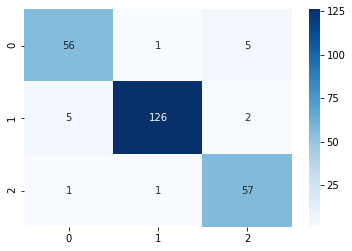

In [49]:
sns.heatmap(metrics_pca,annot=True,fmt='g',cmap='Blues')

In [67]:
print(classification_report(test_y,predict))

              precision    recall  f1-score   support

           1       0.90      0.90      0.90        62
           2       0.98      0.95      0.97       133
           3       0.89      0.97      0.93        59

    accuracy                           0.94       254
   macro avg       0.93      0.94      0.93       254
weighted avg       0.94      0.94      0.94       254



In [44]:
pca_svm_accuracy=accuracy_score(test_y,predict)
pca_svm_accuracy

0.9409448818897638

In [45]:

pca_svm_eval = cross_val_score(estimator = best_PCA_SVC, X = train_X, y = train_y, cv = 10)
pca_svm_eval.mean()

0.9442090395480225

<h3>Obv:</h3>
The heat map shows that the model perdicts the outcome pretty good as the data are pretty much correlated.<br>
The f1 score is also looks fine (90%)<br>
As we can see the accuracy is 94.09% which indicates the model predicts well enough.<br>
The mean after the cross validation is also showing the better result 94.4%<br>

<h2>Comparig the model </h2><h4>with and without PCA</h4>

In [46]:
data=[[svm_accuracy,svm_eval.mean()],[pca_svm_accuracy,pca_svm_eval.mean()]]

In [47]:
compare=pd.DataFrame(data,columns=["Accuracy","Cross validation Mean"],index=["SVC","SVC with PCA"])
compare

,Accuracy,Cross validation Mean
SVC,0.952756,0.959407
SVC with PCA,0.940945,0.944209


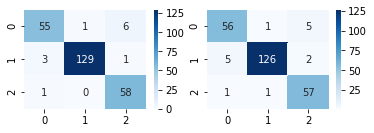

In [70]:
plt.subplot(2,2,1)
sns.heatmap(metrics,annot=True,fmt='g',cmap='Blues')
plt.subplot(2,2,2)
sns.heatmap(metrics_pca,annot=True,fmt='g',cmap='Blues')

<h3>We can see that SVM is good model for classification as it gives good accuracy score<br>
    And also Principal Companent Analysis is good for reducing the dimension of the dataset ( here from 18 to 8 ) with neglegible accuracy and cross validation score (nearly 1 % of decrease) which is good.